# Likes Per Day

For this tutorial, you will need the `liked_posts.html` file from Instagram. This file is found in the `likes` directory. If you don't have this export, I've provided some fake data in `./csv/fake_data/liked_posts.csv`


### HTML to TXT

Using the tools from last week, convert the html file to a txt file.

`html2text liked_posts.html > liked_posts.txt`


### TXT to CSV

Excel struggled with the size of my file, so I edited my txt file in Visual Studio Code using RegEx expressions in the find and replace menu to convert it into a csv.

1. Delete the first few lines (until the first username)
2. Open the find and replace menu (cmd + f)
3. Enable RegEx expressions (the button that looks like .* )
4. Expand the menu to show the replace field
5. Search for <`.*www.instagram.com.*`>
6. Delete all found instances by clicking in the replace field, leaving it empty and pressing cmd + enter
7. Search for <`\n\n\n`> and delete all instances
8. Search from <`\n\n`> and replace with <`\n`>
9. Search for <`20(..), .*\n`> and replace with <`20$1\n`>
10. Search for <`, 20`> and replace with <`-20`>
11. Search for <`Jan `> and replace with <`01-`>
12. Repeat #11 for each month
13. Search for <`^(.*)\n(.)`> and replace with <`$1,$2`>
14. Add a header column `user,date` and save as a csv

### Install Pandas

If you need to install pandas, you can install using pip:

`pip install pandas`

`pip3 install pandas`

### Import Pandas

Here we import pandas for the notebook. We can reference the module with `pd.method()`.

In [1]:
import pandas as pd

### Read CSV

Now we can use the `read_csv` method to read our csv file into a data frame. Since our dataset has a column with dates, we use the `parse_dates` parameter to correctly parse these values.

In [2]:
filename = './csv/fake_data/liked_posts.csv'
df = pd.read_csv(filename, parse_dates=['date'])

df

,user,date
0,zeevzaeqevmeza,2014-03-21
1,oeefezepvezfeez,2014-03-21
2,zeeeefzeezeveefeqz,2014-03-21
3,efveeff,2014-03-20
4,zeeeefzeezeveefeqz,2014-03-20
...,...,...
30415,eepezopfoz,2020-01-13
30416,veepaqaeppez,2020-01-13
30417,qeppeeeqeeaeqfqzpe,2020-01-13
30418,qefozvopozoeeq,2020-01-13


### Date Frame Info

The `info` method will give us details about our data frame. We can see the column names, counts, and types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30420 entries, 0 to 30419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   user    30420 non-null  object        
 1   date    30420 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 475.4+ KB


### Min / Max

We can use the `min` and `max` methods to find the earliest and latest likes. To do this, we'll need to select the date column then use the `min` or `max` methods.

We can select the date column in two ways:

`df['date']`

`df.date`

In [4]:
print(df.date.min())
print(df['date'].min())
df['date'].max()

2012-07-03 00:00:00
2012-07-03 00:00:00


Timestamp('2022-02-09 00:00:00')

### Sort Values

We can use the `sort_values` method to sort our data frame. We can use the `by` parameter to sort by a column's name. Additionally, the `ascending` controls the order of the sort.

In [5]:
df.sort_values(by='date', ascending=False)

,user,date
29151,zeqeeepaoozfmeeveq,2022-02-09
29152,zeqeeepaoozfmeeveq,2022-02-09
29153,zoeqfqeefqoz,2022-02-08
29154,qeppmzeev,2022-02-08
29155,qegfqeaeqee,2022-02-08
...,...,...
551,qeeqqez82,2012-07-03
550,qeeqqez82,2012-07-03
549,aofqeeqezqezf,2012-07-03
563,qqevepveqfqzpef,2012-07-03


In [6]:
df.sort_values(by='date', ascending=True)

,user,date
560,mqeeqqoeze91,2012-07-03
561,veevofeoaezvz,2012-07-03
549,aofqeeqezqezf,2012-07-03
550,qeeqqez82,2012-07-03
551,qeeqqez82,2012-07-03
...,...,...
29155,qegfqeaeqee,2022-02-08
29154,qeppmzeev,2022-02-08
29153,zoeqfqeefqoz,2022-02-08
29152,zeqeeepaoozfmeeveq,2022-02-09


### Drop Duplicates

The `drop_duplicates` method allows us to drow identical rows from the data table.

In [7]:
uniques = df.drop_duplicates(keep="first")

uniques

,user,date
0,zeevzaeqevmeza,2014-03-21
1,oeefezepvezfeez,2014-03-21
2,zeeeefzeezeveefeqz,2014-03-21
3,efveeff,2014-03-20
4,zeeeefzeezeveefeqz,2014-03-20
...,...,...
30415,eepezopfoz,2020-01-13
30416,veepaqaeppez,2020-01-13
30417,qeppeeeqeeaeqfqzpe,2020-01-13
30418,qefozvopozoeeq,2020-01-13


### Group and Count

We can couple the `groupby` and `count` methods to count occurrences by date.

In [8]:
df.groupby('user').count()

,date
user,
007poevfmeqqfeeveeef6176,1
03mozqe3,1
1010zeqe3405,1
11g08em,25
303apeqf,2
...,...
zzmef,1
zzmezqoopzeqef,1
zzpezzqzeee,4


In [9]:
uniques.groupby('user').count()

,date
user,
007poevfmeqqfeeveeef6176,1
03mozqe3,1
1010zeqe3405,1
11g08em,23
303apeqf,2
...,...
zzmef,1
zzmezqoopzeqef,1
zzpezzqzeee,4


### Reset Index

We can use the `reset_index` method to add a name for the count returned if we want to use it in another operation.

In [10]:
df.groupby('date')['date'].count().reset_index(name='count').sort_values(by='count')

,date,count
2193,2021-11-04,1
2218,2021-12-04,1
2217,2021-12-03,1
2216,2021-12-02,1
2208,2021-11-22,1
...,...,...
1154,2018-02-06,148
1091,2017-12-01,158
1064,2017-11-03,160
1101,2017-12-13,160


In [11]:
df.groupby('user')['user'].count().reset_index(name='count').sort_values(by='count')

,user,count
0,007poevfmeqqfeeveeef6176,1
1292,peveqqeeeqeqe,1
1291,pevepeozeezf,1
1290,pevegoezfep,1
1287,pevefgpeaqgpef,1
...,...,...
1796,veezezveeqovee,630
2074,zeezezeoopf,635
437,eoezeeqeeeqeqef,651
647,ezeeaezz,691


### Merge

We can use the `merge` method to merge the number of unique and non-unique likes. 

In [12]:
non_unique_counts = df.groupby('date')['date'].count().reset_index(name='non_unique')
unique_counts = uniques.groupby('date')['date'].count().reset_index(name='unique')

merged = non_unique_counts.merge(unique_counts, on='date')

merged

,date,non_unique,unique
0,2012-07-03,15,11
1,2012-07-14,1,1
2,2012-09-26,1,1
3,2013-07-03,1,1
4,2013-07-04,1,1
...,...,...,...
2261,2022-02-04,1,1
2262,2022-02-05,1,1
2263,2022-02-07,1,1
2264,2022-02-08,3,3


### Plot

Now that we have the counts per day, we can visualize the data in a plot using the `plot` method.

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Likes')]

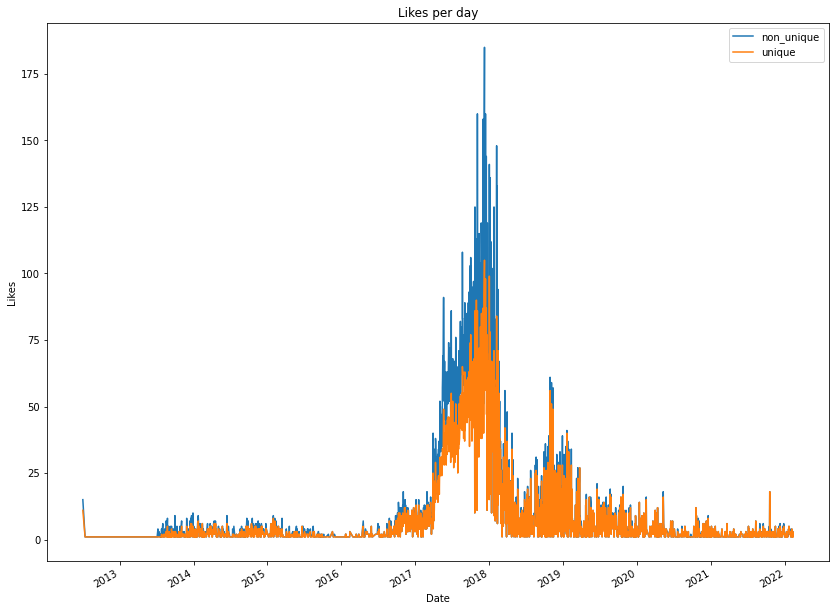

In [13]:
merged_plot = merged.plot(x='date', y=['non_unique', 'unique'], title='Likes per day', figsize=(14, 11))
merged_plot.set(xlabel='Date', ylabel='Likes')

# merged_plot.get_figure().savefig('./pdf/likes_per_day.pdf') # uncomment and run to save the figure as a pdf

### Filter 

Thats a lot of data. Let's zoom into a smaller time range by selecting columns using a mask.

If we want to look at the likes between 2017 and 2019, we can apply the mask:

 `(merged['date'].dt.year >= 2017) & (merged['date'].dt.year <= 2019)`

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Likes')]

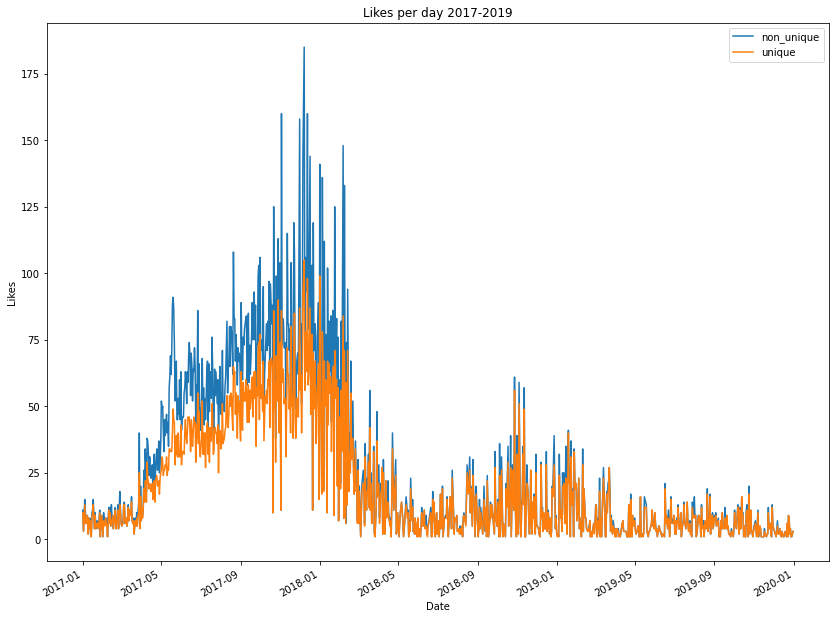

In [14]:
masked = merged[(merged['date'].dt.year >= 2017) & (merged['date'].dt.year <= 2019)]
maksed_plot = masked.plot(x='date', y=['non_unique', 'unique'], title='Likes per day 2017-2019', figsize=(14, 11))
maksed_plot.set(xlabel='Date', ylabel='Likes')

# maksed_plot.get_figure().savefig('./pdf/likes_per_day_2017-2019.pdf') # uncomment and run to save the figure as a pdf